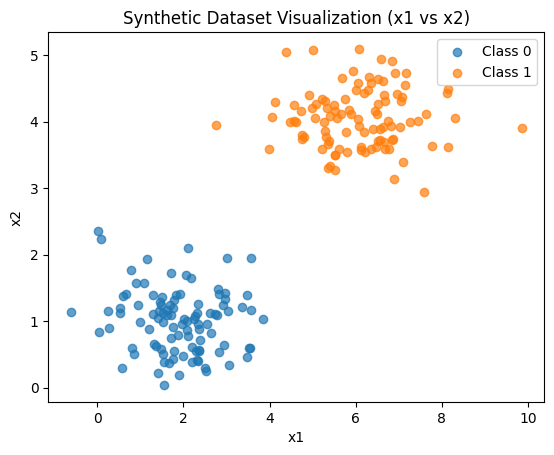

Dataset Head:
         x1        x2  x3        x4  y
0  0.536485  1.192659   0  0.004632  0
1  1.437712  1.150774   1  0.301378  0
2  1.398293  0.224668   0  0.620073  0
3  6.443819  4.161359   1  0.799916  1
4  5.284696  4.312060   0  0.205140  1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic dataset
np.random.seed(42)

# Continuous features with Gaussian distribution
x1_class0 = np.random.normal(2, 1, 100)  # Mean=2, Std=1 for Class 0
x2_class0 = np.random.normal(1, 0.5, 100)  # Mean=1, Std=0.5 for Class 0
x1_class1 = np.random.normal(6, 1, 100)  # Mean=6, Std=1 for Class 1
x2_class1 = np.random.normal(4, 0.5, 100)  # Mean=4, Std=0.5 for Class 1

# Combine features into arrays
x1 = np.concatenate([x1_class0, x1_class1])
x2 = np.concatenate([x2_class0, x2_class1])

# Binary feature
x3 = np.random.choice([0, 1], size=200, p=[0.5, 0.5])

# Noise feature
x4 = np.random.uniform(0, 1, 200)

# Target labels
y = np.array([0]*100 + [1]*100)

# Combine all features into a DataFrame
df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4,
    'y': y
})

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save dataset to CSV for reuse
df.to_csv('synthetic_classification_dataset.csv', index=False)

# Visualize the data distribution
plt.scatter(df[df['y'] == 0]['x1'], df[df['y'] == 0]['x2'], label='Class 0', alpha=0.7)
plt.scatter(df[df['y'] == 1]['x1'], df[df['y'] == 1]['x2'], label='Class 1', alpha=0.7)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title("Synthetic Dataset Visualization (x1 vs x2)")
plt.show()

print("Dataset Head:")
print(df.head())


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('synthetic_classification_dataset.csv')
X = df[['x1', 'x2', 'x3', 'x4']]
y = df['y']


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
df = pd.read_csv('synthetic_classification_dataset.csv')

# Split data into features (X) and target (y)
X = df[['x1', 'x2', 'x3', 'x4']]
y = df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (SVM)": SVC(kernel='rbf', probability=True)
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Save results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

    # Display classification report for the model
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the performance comparison
print("\nModel Performance Comparison:")
print(results_df)


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

--------------------------------------------------
Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

--------------------------------------------------
Classification Report for K-Nearest Neighbors (KNN):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    